In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# pre processing

# junk data
import re

# tokenize
from nltk import tokenize
from nltk.tokenize import word_tokenize,TweetTokenizer

# stopwords
from nltk.corpus import stopwords

# stemming
from nltk.stem import PorterStemmer as ps

# Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer 

# pos taging
import nltk



In [3]:
# emotion 

import spacy

nlp = spacy.load('en_core_web_sm')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
emusk = pd.read_csv('Elon_musk.csv',encoding= 'Latin-1')

In [6]:
emusk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
emusk.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
emusk = [x.strip() for x in emusk['Text']]

emusk = [x for x in emusk if x]

emusk[:2]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?']

In [9]:
# Striping / removing Tweet handle Name

tok = TweetTokenizer(strip_handles= True)

emusk_no_han = tok.tokenize(' '.join(emusk))

In [10]:
print(emusk_no_han[0:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


In [ ]:
# Sentence tokenized data

In [11]:
emusk_sent_token = tokenize.sent_tokenize(' '.join(emusk))
emusk_sent_token[:5]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!']

In [12]:
emusk_token_df = pd.DataFrame(emusk_sent_token,columns=['Text'])

emusk_token_df.head()

,Text
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!


In [ ]:
# Calculating affinity score now

In [13]:
affin = pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [14]:
# creating a dict 

affinity_score = affin.set_index('word')['value'].to_dict()

In [15]:
affinity_score 

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# assign the sentiment score to each tweet

In [16]:
def calculating_sentiment(text: str=None):
    
    sentiment_score = 0
    
    if text:
        
        sentence = nlp(text)
        
        for word in sentence:
            sentiment_score += affinity_score.get(word.lemma_,0)
        
        return sentiment_score
            

In [17]:
calculating_sentiment('bad')

-3

In [18]:
# now cal sentiment score for each tweet

emusk_token_df['Sentiment_value'] = emusk_token_df['Text'].apply(calculating_sentiment)

In [19]:
emusk_token_df.head()

,Text,Sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0


In [20]:
emusk_token_df['index'] = range(0,len(emusk_token_df))

In [21]:
emusk_token_df['word_count'] = emusk_token_df['Text'].str.split().apply(len)

In [22]:
emusk_token_df.head()

,Text,Sentiment_value,index,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0,13
1,Have you tried it?,0,1,4
2,@joerogan @Spotify Great interview!,3,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3,13
4,Now on to the next for even more!!,0,4,8


In [23]:
emusk_token_df[emusk_token_df['Sentiment_value']>=3]

,Text,Sentiment_value,index,word_count
2,@joerogan @Spotify Great interview!,3,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3,13
9,The most entertaining outcome is the most like...,3,9,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,17,38
24,So its finally come to this https://t.co/...,4,24,13
...,...,...,...,...
911,He was one of the very best.,3,911,7
913,"@Ali_Afshari In general, we need to improve ho...",4,913,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,915,15
917,This is both great &amp; terrifying.,3,917,6


In [24]:
np.max(emusk_token_df['Sentiment_value'])

16

In [25]:
emusk_token_df[emusk_token_df['Sentiment_value']>=15]

,Text,Sentiment_value,index,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,36,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,105,94
719,We just havent observed the https://t.co/mez...,15,719,72


In [26]:
np.min(emusk_token_df['Sentiment_value'])

-8

In [27]:
emusk_token_df[emusk_token_df['Sentiment_value']<=-5]

,Text,Sentiment_value,index,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,64,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,647,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,837,61


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

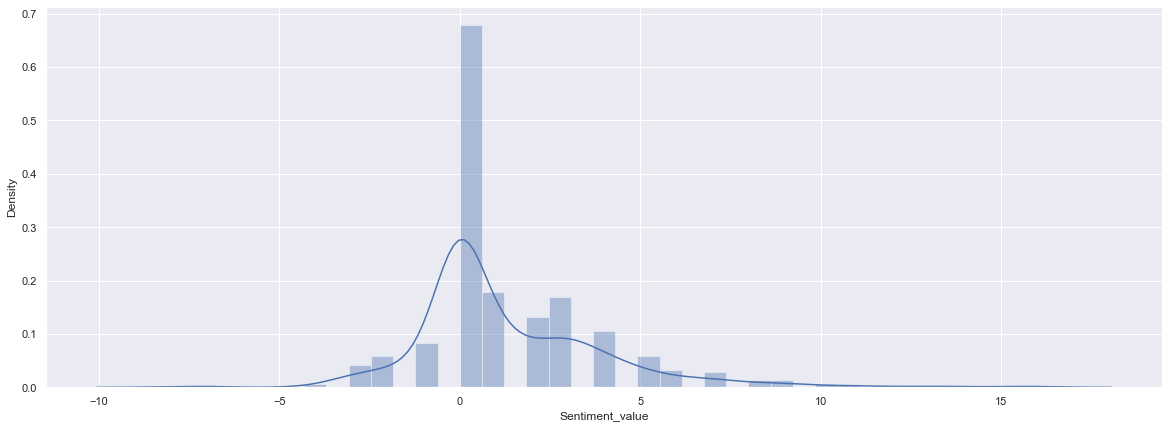

In [28]:
# Ploting Distribution 

plt.figure(figsize=(20,7))

sns.distplot(emusk_token_df['Sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='Sentiment_value'>

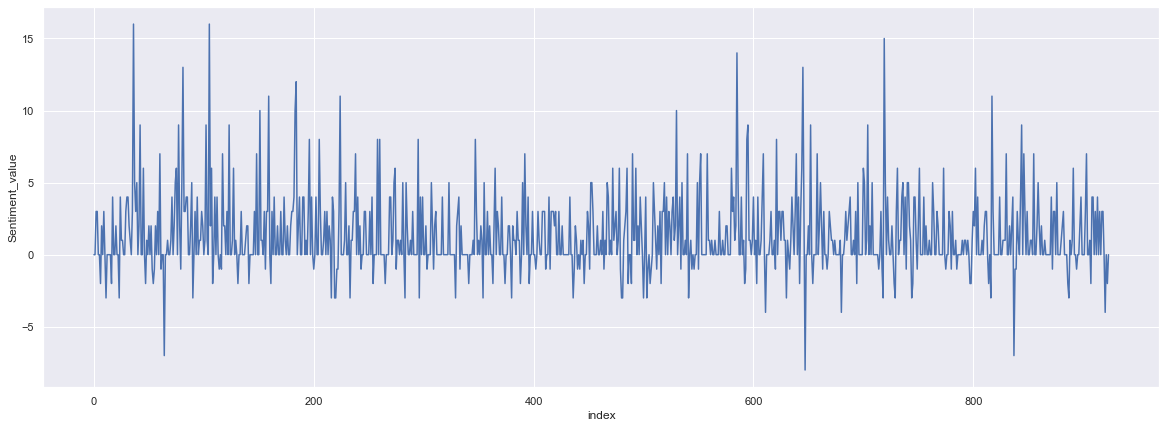

In [29]:
plt.figure(figsize=(20,7))

sns.lineplot(y = emusk_token_df['Sentiment_value'], x = emusk_token_df['index'] )

<AxesSubplot:xlabel='word_count', ylabel='Sentiment_value'>

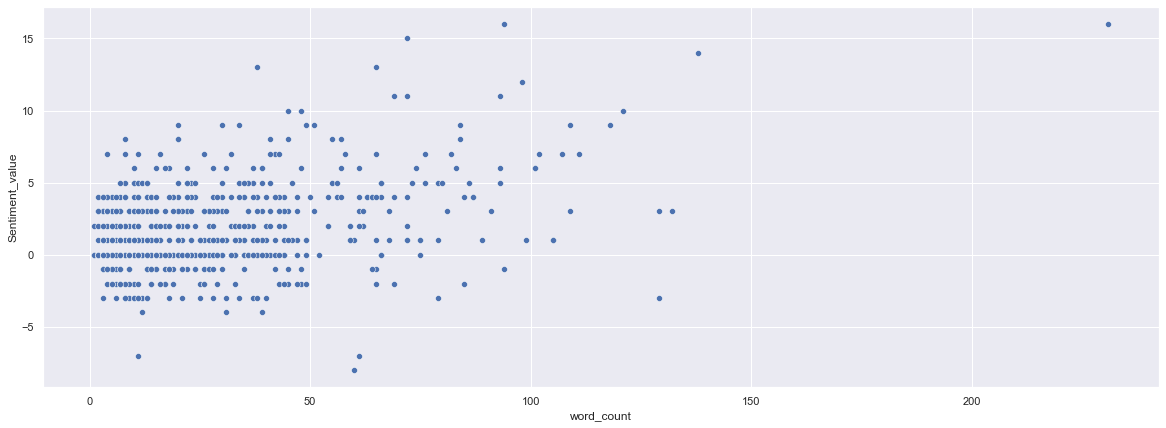

In [30]:
plt.figure(figsize=(20,7))

sns.scatterplot(y = emusk_token_df['Sentiment_value'], x = emusk_token_df['word_count'] )